In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\joy\Documents\Customers.csv")
df.head()

,CustomerKey,Prefix,FirstName,LastName,Unnamed: 4,Unnamed: 5,Unnamed: 6,BirthDate,Unnamed: 8,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Unnamed: 17,Unnamed: 18,BirthDate.1
0,11000,MR.,JON,YANG,MR. JON YANG,YANG,YANG,4/8/1966,NaN,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y,NaN,NaN,14-05-1965
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,HUANG,HUANG,14/05/1965,NaN,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N,NaN,NaN,15-02-1968
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,TORRES,TORRES,8/12/1965,NaN,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y,NaN,NaN,NaN
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,ZHU,ZHU,15/02/1968,NaN,S,F,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,N,NaN,NaN,NaN
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,JOHNSON,JOHNSON,8/8/1968,NaN,S,F,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Y,NaN,NaN,NaN


# Count of Customers by Marital Status.

In [2]:
df.MaritalStatus.value_counts()

MaritalStatus
M    9817
S    8331
Name: count, dtype: int64

Text(0, 0.5, 'Marital Status')

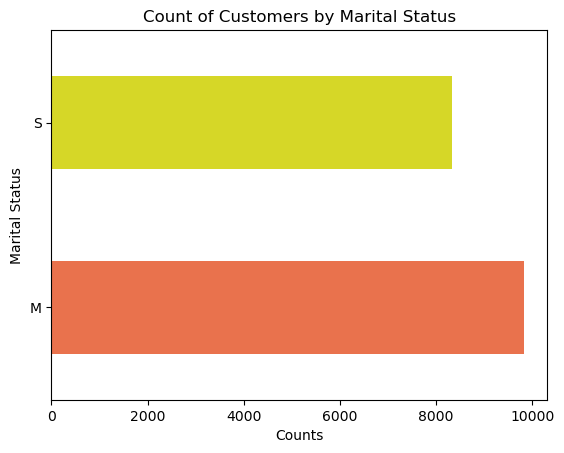

In [3]:
df.MaritalStatus.value_counts().plot(kind = "barh", color = ["#e9724d", "#d6d727" ])
plt.title("Count of Customers by Marital Status")
plt.xlabel("Counts")
plt.ylabel("Marital Status")

# The proportion of customers by Gender using a pie chart

Text(0.5, 1.0, 'Proportion of Customers by Gender')

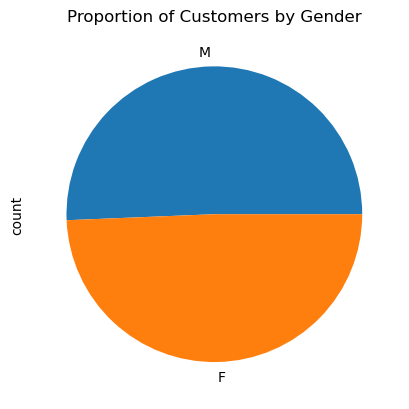

In [4]:
df.Gender.value_counts().plot(kind = "pie")
plt.title("Proportion of Customers by Gender")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerKey     18148 non-null  int64  
 1   Prefix          18018 non-null  object 
 2   FirstName       18148 non-null  object 
 3   LastName        18148 non-null  object 
 4   Unnamed: 4      18148 non-null  object 
 5   Unnamed: 5      18148 non-null  object 
 6   Unnamed: 6      46 non-null     object 
 7   BirthDate       18148 non-null  object 
 8   Unnamed: 8      0 non-null      float64
 9   MaritalStatus   18148 non-null  object 
 10  Gender          18018 non-null  object 
 11  EmailAddress    18148 non-null  object 
 12  AnnualIncome    18148 non-null  object 
 13  TotalChildren   18148 non-null  int64  
 14  EducationLevel  18148 non-null  object 
 15  Occupation      18148 non-null  object 
 16  HomeOwner       18148 non-null  object 
 17  Unnamed: 17     0 non-null     

# Generating a histogram of Annual Income to examine its distribution 

In [6]:
df['AnnualIncome'].head(3)

0    $90,000 
1    $60,000 
2    $60,000 
Name: AnnualIncome, dtype: object

In [7]:
# Stripping off the dollar sign
df['AnnualIncome'] = df['AnnualIncome'].str.strip("$")
df['AnnualIncome']

0        90,000 
1        60,000 
2        60,000 
3        70,000 
4        80,000 
          ...   
18143    30,000 
18144    30,000 
18145    30,000 
18146    30,000 
18147    30,000 
Name: AnnualIncome, Length: 18148, dtype: object

In [8]:
# Replacing the comma and converting it to an integer
df['AnnualIncome'] = df['AnnualIncome'].replace({',' : '', ' ': ''}, regex=True).astype(int)
df['AnnualIncome']

0        90000
1        60000
2        60000
3        70000
4        80000
         ...  
18143    30000
18144    30000
18145    30000
18146    30000
18147    30000
Name: AnnualIncome, Length: 18148, dtype: int32

Text(0, 0.5, 'Frequency')

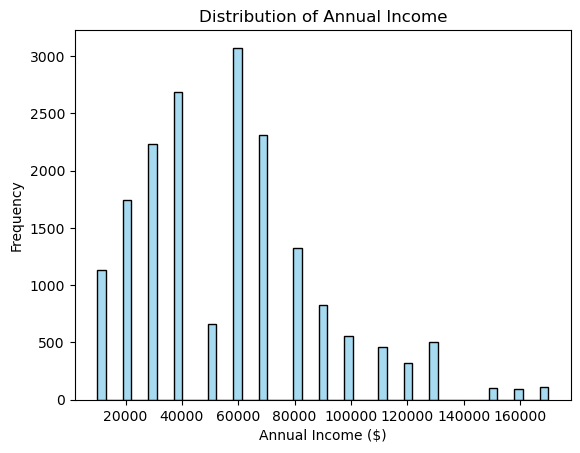

In [9]:
# Visualization using seaborn
sns.histplot(data=df, x='AnnualIncome', color='Skyblue', linewidth=1)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')

# The average number of TotalChildren for each EducationLevel


In [10]:
# Calculating the average number of TotalChildren
avg_num_children = df.groupby('EducationLevel')['TotalChildren'].mean().reset_index()
avg_num_children

,EducationLevel,TotalChildren
0,Bachelors,1.884243
1,Graduate Degree,1.906240
2,High School,1.947856
3,Partial College,1.748087
4,Partial High School,1.668167


Text(0, 0.5, 'Average number of TotalChildren')

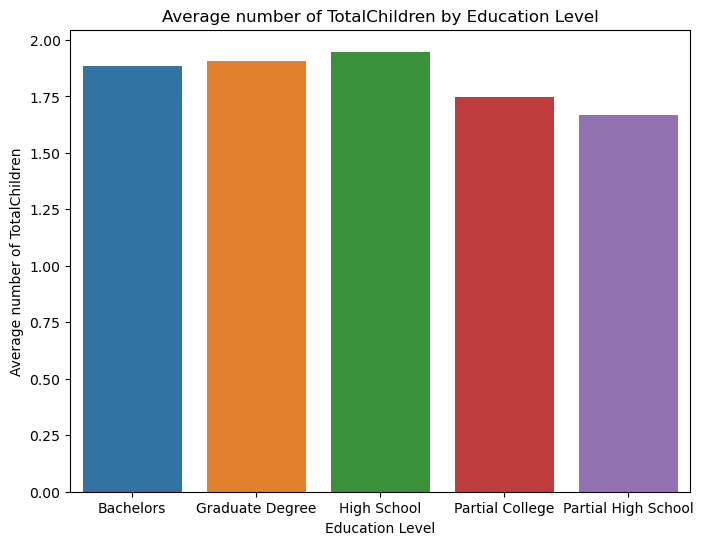

In [11]:
# Visualizing the average number of TotalChildren for each EducationLevel
plt.figure(figsize=(8,6))
sns.barplot(data=avg_num_children, x= 'EducationLevel', y='TotalChildren')
plt.title('Average number of TotalChildren by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average number of TotalChildren')

# The average AnnualIncome across different Occupation categories.


In [12]:
df['Occupation'].unique()

array(['Professional', 'Management', 'Skilled Manual', 'Clerical',
       'Manual'], dtype=object)

In [13]:
# calculating the total sum of AnnualIncome for each Occupation
df.groupby('Occupation')['AnnualIncome'].sum()

Occupation
Clerical           87760000
Management        277670000
Manual             38760000
Professional      402280000
Skilled Manual    232850000
Name: AnnualIncome, dtype: int32

In [14]:
# Calculating the average Annual Income for each Occupation.
avg_income = df.groupby('Occupation')['AnnualIncome'].mean().reset_index()
avg_income

,Occupation,AnnualIncome
0,Clerical,30696.047569
1,Management,92218.532049
2,Manual,16472.588185
3,Professional,74166.666667
4,Skilled Manual,51732.948234


Text(0, 0.5, 'Average Annual Income')

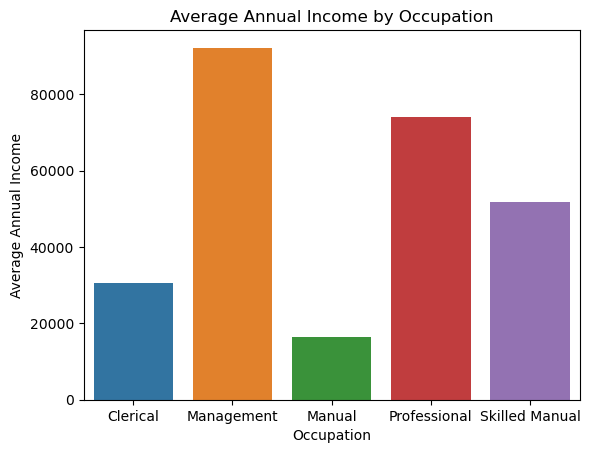

In [15]:
# Visualizing the average income of each occupation
sns.barplot(data = avg_income, x = 'Occupation', y = 'AnnualIncome')
plt.title("Average Annual Income by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Annual Income")

# Count of customers in each Occupation category using a pie chart.


In [16]:
# Calcualting the Count of Customers in each Occupation Category
df['Occupation'].value_counts()

Occupation
Professional      5424
Skilled Manual    4501
Management        3011
Clerical          2859
Manual            2353
Name: count, dtype: int64

Text(0, 0.5, 'Occupation')

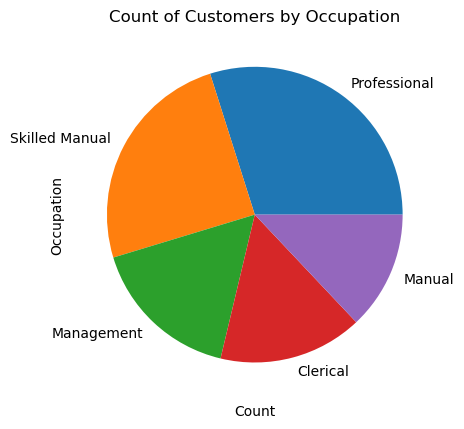

In [17]:
plt.title("Count of Customers by Occupation")
df['Occupation'].value_counts().plot(kind='pie')
plt.xlabel("Count")
plt.ylabel("Occupation")

# The age distribution of customers

In [18]:
# Converting date column to datetime, by first defining the possible formats
# Trying to parse with each format
# This code iterates over the list of formats, attempting to parse the date column with each format. 
# If parsing succeeds, it breaks out of the loop. This way, it can handle multiple date formats in the column.
from datetime import datetime
formats = ['%m/%d/%Y', '%d/%m/%Y']
for fmt in  formats:
    try:
        df['BirthDate'] = pd.to_datetime(df['BirthDate'], format=fmt)
        break
    except ValueError:
        pass # if parsing fails, try the next format

# Calculating Age from Datetime
current_date = datetime.now()
df['Age'] = current_date.year - df['BirthDate'].dt.year
df['Age'].head()

0    58
1    59
2    59
3    56
4    56
Name: Age, dtype: int32

<Figure size 800x600 with 0 Axes>

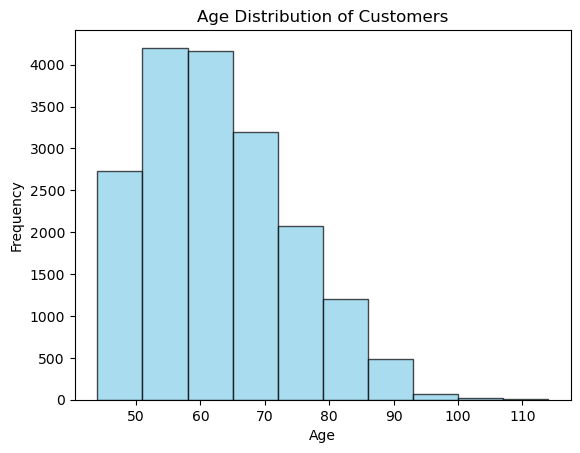

<Figure size 800x600 with 0 Axes>

In [19]:
# Plotting the histogram
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.hist(df['Age'], color = 'Skyblue', bins = 10, edgecolor='black', alpha=0.7)
plt.figure(figsize=(8, 6))

#  Changes in the average AnnualIncome over different age groups.


In [20]:
# Defining the age groups
# Defining the age bins
# Defining the labels for age groups
bins = [0, 50, 60, 70, 80, 90, 100, 110]
labels = ['0-50', '51-70', '71-80', '81-90', '91-100', '101-110', '111-120']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [21]:
# Calculating the average annual income for the age groups
avg_income_by_age_groups = df.groupby('AgeGroup')['AnnualIncome'].mean()
avg_income_by_age_groups

AgeGroup
0-50       35503.144654
51-70      57610.324729
71-80      62510.929481
81-90      62870.611183
91-100     59646.539028
101-110    54308.510638
111-120    28461.538462
Name: AnnualIncome, dtype: float64

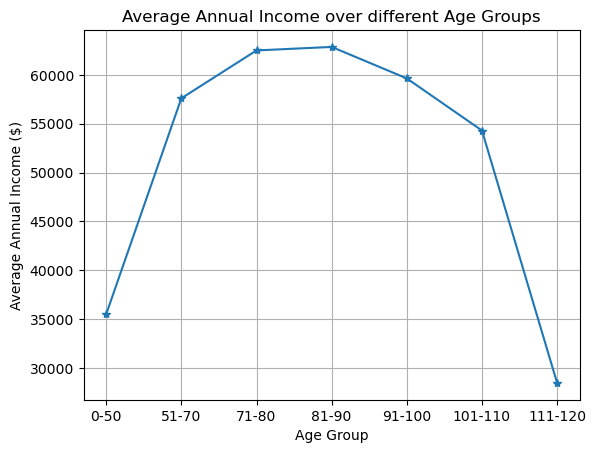

In [22]:
# Plotting line chart
avg_income_by_age_groups.plot(kind = 'line', marker="*")
plt.title("Average Annual Income over different Age Groups")
plt.xlabel('Age Group')
plt.ylabel("Average Annual Income ($)")
plt.grid(True)

#  A Bar Chart that shows Home Owner Status

In [23]:
df['HomeOwner'].value_counts()

HomeOwner
Y    12260
N     5888
Name: count, dtype: int64

Text(0, 0.5, 'Home Owner')

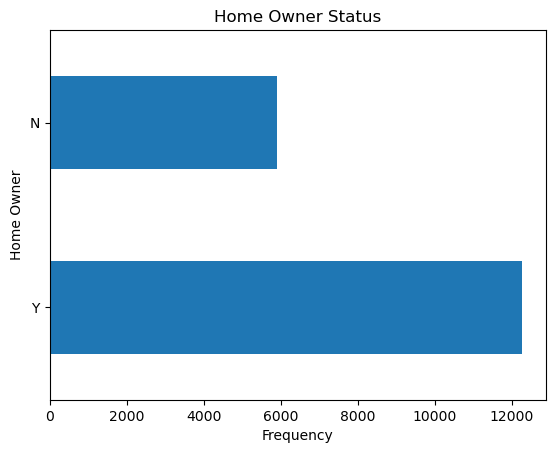

In [24]:
df['HomeOwner'].value_counts().plot(kind = 'barh')
plt.title("Home Owner Status")
plt.xlabel("Frequency")
plt.ylabel("Home Owner")

# The total number of customers by Education Level.


Text(0.5, 1.0, 'Total Number of Customers by Education Level')

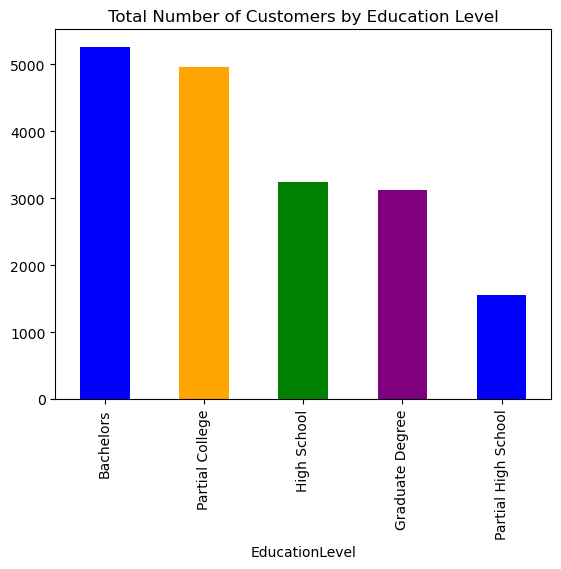

In [68]:
df['EducationLevel'].value_counts().plot(kind="bar", color=['Blue', 'Orange', 'green', 'purple'])
plt.title("Total Number of Customers by Education Level")

#  The distribution of Total Children using a histogram.

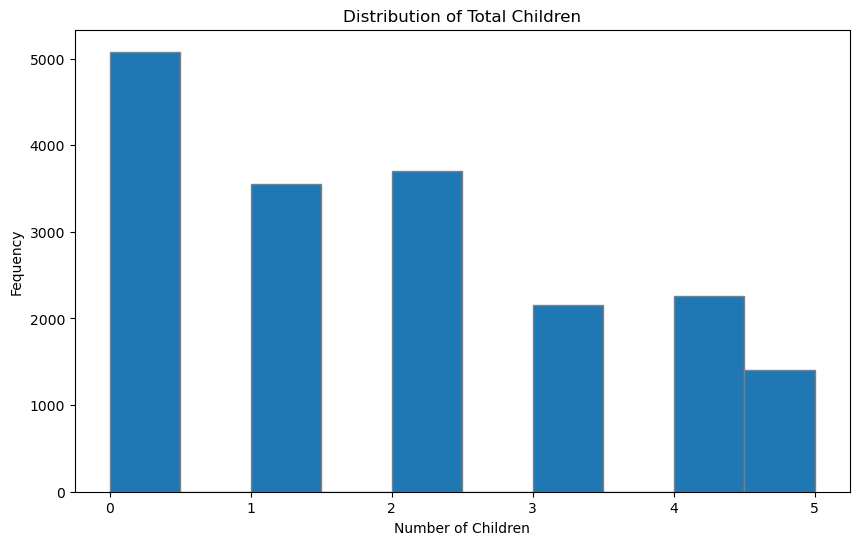

In [77]:
# PLotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['TotalChildren'], edgecolor='gray')
plt.title("Distribution of Total Children")
plt.xlabel("Number of Children")
plt.ylabel("Fequency")
plt.grid(False)

# A pie chart showing the proportion of different MaritalStatus categories within a specific Occupation.


In [25]:
# The proportion of different Marital Status categories within a specific occupation.
df.groupby('MaritalStatus')['Occupation'].value_counts().reset_index()

,MaritalStatus,Occupation,count
0,M,Professional,3062
1,M,Skilled Manual,2669
2,M,Management,1888
3,M,Clerical,1407
4,M,Manual,791
5,S,Professional,2362
6,S,Skilled Manual,1832
7,S,Manual,1562
8,S,Clerical,1452
9,S,Management,1123


Text(0.5, 1.0, 'Proportion of Different Marital Status within Specific Occupation')

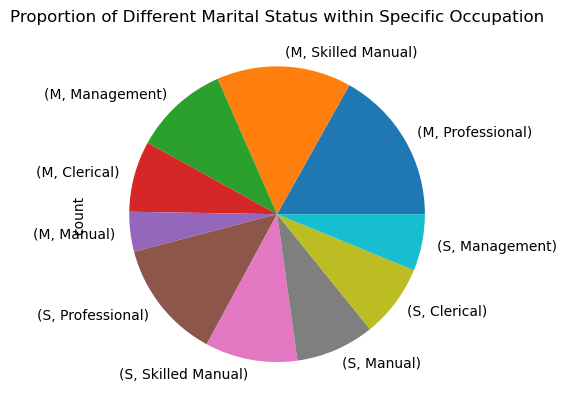

In [26]:
df.groupby('MaritalStatus')['Occupation'].value_counts().plot(kind = "pie")
plt.title("Proportion of Different Marital Status within Specific Occupation")

#  A bar chart comparing the count of male vs. female customers in each EducationLevel.


In [103]:
# Calculating the counts of female vs male Gender for each Educational Level
df.groupby(['EducationLevel', 'Gender']).size().unstack()

Gender,F,M
EducationLevel,,
Bachelors,2564,2665
Graduate Degree,1567,1536
High School,1555,1668
Partial College,2465,2458
Partial High School,741,799


Text(0, 0.5, 'Counts')

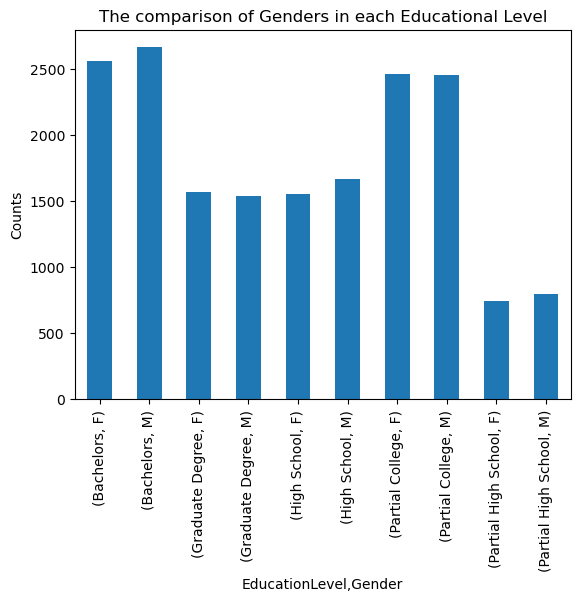

In [105]:
# Plotting the Bar Chart
df.groupby(['EducationLevel', 'Gender']).size().plot(kind="bar")
plt.title("The comparison of Genders in each Educational Level")
plt.ylabel("Counts")

# The average number of TotalChildren across different income ranges.


In [27]:
# getting the unique values of the AnnualIncome
df['AnnualIncome'].unique()

array([ 90000,  60000,  70000,  80000, 100000,  30000,  20000,  40000,
        10000, 160000, 170000, 120000, 130000, 110000, 150000,  50000])

In [28]:
# Defining the income range
bins = [0, 50000, 80000, 130000, 180000]
labels = ['< 50000', '51000 - 90000', '91000 - 120000', '> 120000']

In [29]:
# Assigning the income range to each row
df['IncomeRange'] = pd.cut(df['AnnualIncome'], bins=bins, labels=labels, right=False)
df['IncomeRange']

0        91000 - 120000
1         51000 - 90000
2         51000 - 90000
3         51000 - 90000
4        91000 - 120000
              ...      
18143           < 50000
18144           < 50000
18145           < 50000
18146           < 50000
18147           < 50000
Name: IncomeRange, Length: 18148, dtype: category
Categories (4, object): ['< 50000' < '51000 - 90000' < '91000 - 120000' < '> 120000']

In [32]:
# Calculating the average number of Total Children for each Income range
avg_children_by_income = df.groupby('IncomeRange')['TotalChildren'].mean()
avg_children_by_income

IncomeRange
< 50000           1.349052
51000 - 90000     2.110321
91000 - 120000    2.407492
> 120000          2.187266
Name: TotalChildren, dtype: float64

Text(0, 0.5, 'Average Number of Children')

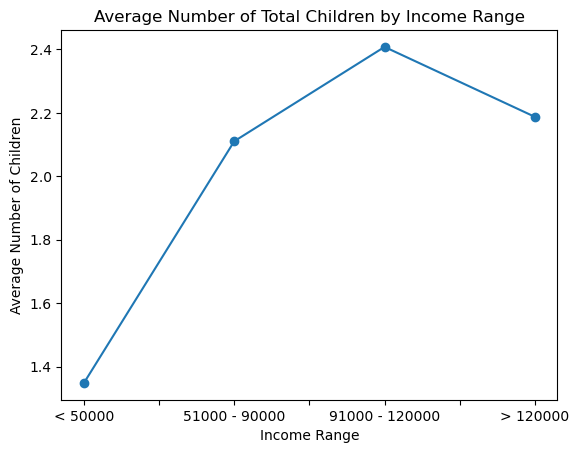

In [37]:
# Plotting the line chart
avg_children_by_income.plot(kind = 'line', marker='o', linestyle = '-')
plt.title("Average Number of Total Children by Income Range")
plt.xlabel("Income Range")
plt.ylabel("Average Number of Children")

# A column chart that shows the count of customers by HomeOwner status for each MaritalStatus



In [108]:
df.groupby(['MaritalStatus', 'HomeOwner']).size().reset_index()

,MaritalStatus,HomeOwner,0
0,M,N,1816
1,M,Y,8001
2,S,N,4072
3,S,Y,4259


Text(0, 0.5, 'Counts')

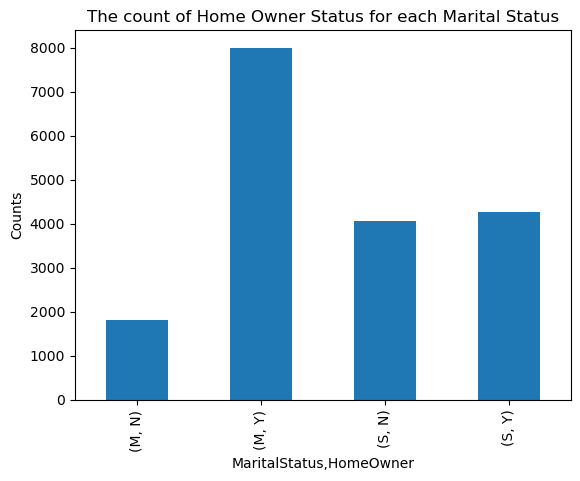

In [119]:
df.groupby(['MaritalStatus', 'HomeOwner']).size().plot(kind = 'bar')
plt.title("The count of Home Owner Status for each Marital Status")
plt.ylabel("Counts")

# The distribution of customers' birth months using a bar chart 

In [48]:
# Converting Birth date to date time.
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
df['BirthDate']

0       1966-08-04
1       1965-05-14
2       1965-12-08
3       1968-02-15
4       1968-08-08
           ...    
18143   1958-04-07
18144   1960-10-11
18145   1960-05-01
18146   1959-05-03
18147   1959-08-12
Name: BirthDate, Length: 18148, dtype: datetime64[ns]

In [49]:
# Extracting the birth month
df['Month'] = df['BirthDate'].dt.month
df['Month']

0         8
1         5
2        12
3         2
4         8
         ..
18143     4
18144    10
18145     5
18146     5
18147     8
Name: Month, Length: 18148, dtype: int32

In [50]:
# Counting the occurrences of each birth month
birth_month = df['Month'].value_counts().sort_index()
birth_month

Month
1      831
2     1578
3     1649
4     1617
5     1607
6     1618
7     1502
8     1635
9     1565
10    1672
11    1709
12    1165
Name: count, dtype: int64

Text(0, 0.5, 'Number of Customers')

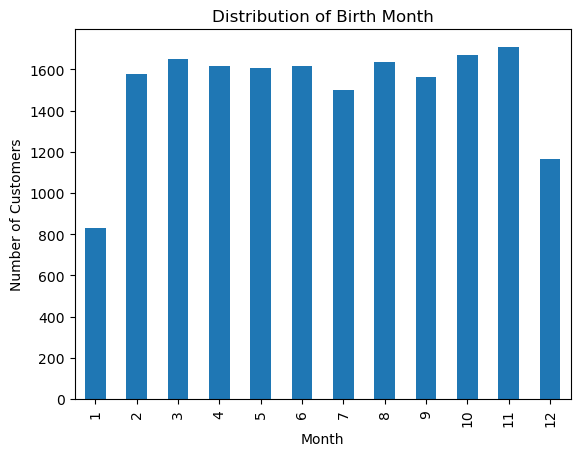

In [52]:
# Plotting the bar chart
birth_month.plot(kind = 'bar')
plt.title("Distribution of Birth Month")
plt.xlabel("Month")
plt.ylabel("Number of Customers")

# The proportion of customers by Occupation within a specific income range.


In [110]:
# Defining the income range
income_range = '20000 - 130000'

In [111]:
# Filtering the DataFrame for customers within the income range
df_range = df[(df['AnnualIncome'] >= 20000) & (df['AnnualIncome'] <= 130000)]
df_range.head()

,CustomerKey,Prefix,FirstName,LastName,Unnamed: 4,Unnamed: 5,Unnamed: 6,BirthDate,Unnamed: 8,MaritalStatus,...,EducationLevel,Occupation,HomeOwner,Unnamed: 17,Unnamed: 18,BirthDate.1,Age,AgeGroup,IncomeRange,Month
0,11000,MR.,JON,YANG,MR. JON YANG,YANG,YANG,1966-08-04,NaN,M,...,Bachelors,Professional,Y,NaN,NaN,14-05-1965,58,51-70,91000 - 120000,8
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,HUANG,HUANG,1965-05-14,NaN,S,...,Bachelors,Professional,N,NaN,NaN,15-02-1968,59,51-70,51000 - 90000,5
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,TORRES,TORRES,1965-12-08,NaN,M,...,Bachelors,Professional,Y,NaN,NaN,NaN,59,51-70,51000 - 90000,12
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,ZHU,ZHU,1968-02-15,NaN,S,...,Bachelors,Professional,N,NaN,NaN,NaN,56,51-70,51000 - 90000,2
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,JOHNSON,JOHNSON,1968-08-08,NaN,S,...,Bachelors,Professional,Y,NaN,NaN,NaN,56,51-70,91000 - 120000,8


In [112]:
# Counting the occurrences of each occupation within each income range
occp_counts = df_range['Occupation'].value_counts()
occp_counts

Occupation
Professional      5328
Skilled Manual    4465
Management        2807
Clerical          2775
Manual            1338
Name: count, dtype: int64

Text(0.5, 1.0, 'The Proportion of Customers by Occupation within a Specific Income range')

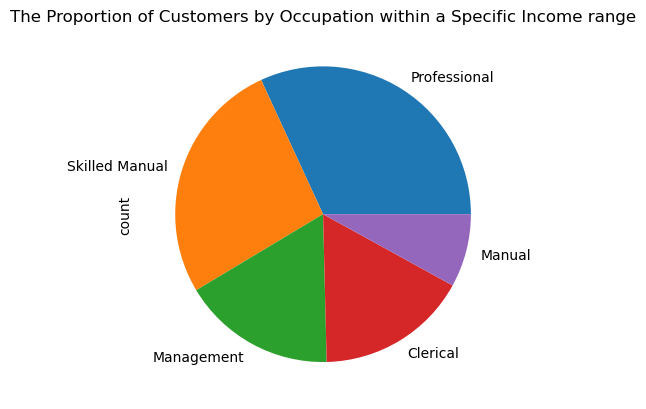

In [113]:
# Plotting the pie chart
occp_counts.plot(kind='pie')
plt.title("The Proportion of Customers by Occupation within a Specific Income range")

# The frequency of each EducationLevel category.

Text(0, 0.5, 'Frequency')

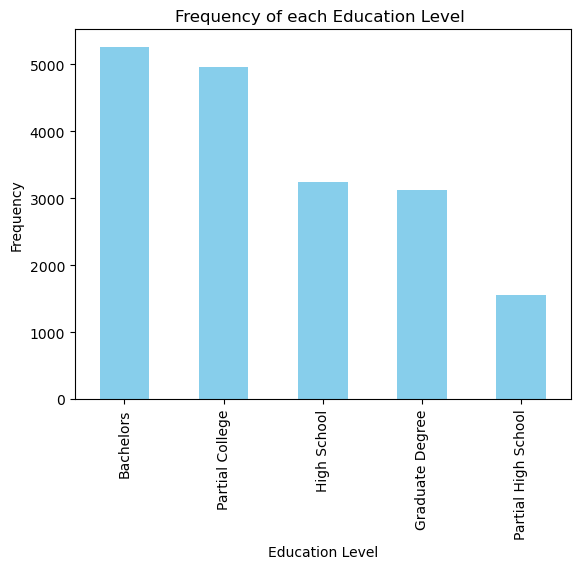

In [89]:
df['EducationLevel'].value_counts().plot(kind='bar', color="skyblue")
plt.title("Frequency of each Education Level ")
plt.xlabel("Education Level")
plt.ylabel("Frequency")